<a href="https://colab.research.google.com/github/rekuantsun/Fruits_Vegetables_recognition/blob/main/Training_fruit_vegetable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing libraries

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

##Training Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Các thuật toán tối ưu/Fruits and vegetables detection/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Các thuật toán tối ưu/Fruits and vegetables detection/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [5]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [15]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 505s 5s/step - loss: 8.8974 - accuracy: 0.0276 - val_loss: 3.5766 - val_accuracy: 0.0427
Epoch 2/32
98/98 [==============================] - 72s 698ms/step - loss: 3.5749 - accuracy: 0.0340 - val_loss: 3.5602 - val_accuracy: 0.0427
Epoch 3/32
98/98 [==============================] - 73s 681ms/step - loss: 3.5681 - accuracy: 0.0411 - val_loss: 3.5529 - val_accuracy: 0.0427
Epoch 4/32
98/98 [==============================] - 72s 689ms/step - loss: 3.5508 - accuracy: 0.0424 - val_loss: 3.5056 - val_accuracy: 0.0541
Epoch 5/32
98/98 [==============================] - 71s 669ms/step - loss: 3.4778 - accuracy: 0.0671 - val_loss: 3.3671 - val_accuracy: 0.1339
Epoch 6/32
98/98 [==============================] - 72s 680ms/step - loss: 3.3587 - accuracy: 0.0867 - val_loss: 3.1541 - val_accuracy: 0.1538
Epoch 7/32
98/98 [==============================] - 69s 664ms/step - loss: 3.2528 - accuracy: 0.1091 - val_loss: 2.9872 - val_accuracy: 0.2051
E

##Evaluating Model

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 60s 569ms/step - loss: 0.6650 - accuracy: 0.8234
Training accuracy: 0.8234350085258484


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 9s 225ms/step - loss: 0.7367 - accuracy: 0.8462
Validation accuracy: 0.8461538553237915


##Saving Model

In [20]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
training_history.history #Return Dictionary of history

{'loss': [8.897404670715332,
  3.5748696327209473,
  3.5681142807006836,
  3.5508100986480713,
  3.4778337478637695,
  3.3587446212768555,
  3.2528090476989746,
  3.111349105834961,
  3.0235018730163574,
  2.955289363861084,
  2.743891716003418,
  2.6333532333374023,
  2.5564990043640137,
  2.3933804035186768,
  2.2838261127471924,
  2.2086026668548584,
  2.1316795349121094,
  2.0769546031951904,
  1.9627692699432373,
  1.9046646356582642,
  1.8167303800582886,
  1.733288049697876,
  1.7573390007019043,
  1.639689326286316,
  1.5178718566894531,
  1.4857929944992065,
  1.354901671409607,
  1.3606764078140259,
  1.256386637687683,
  1.1255863904953003,
  1.068841814994812,
  1.0437566041946411],
 'accuracy': [0.027608346194028854,
  0.03402889147400856,
  0.041091494262218475,
  0.0423756018280983,
  0.06709470599889755,
  0.08667736500501633,
  0.1091492772102356,
  0.13611556589603424,
  0.16115570068359375,
  0.18394863605499268,
  0.23820224404335022,
  0.2683788239955902,
  0.29438

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy of Model Achieved on Validation set

In [24]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 84.61538553237915 %


#Accuracy Visualization

##Training Visualization

In [25]:
#training_history.history['accuracy']

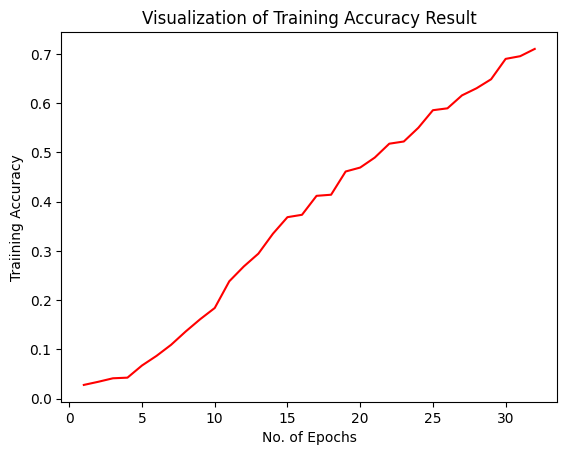

In [26]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

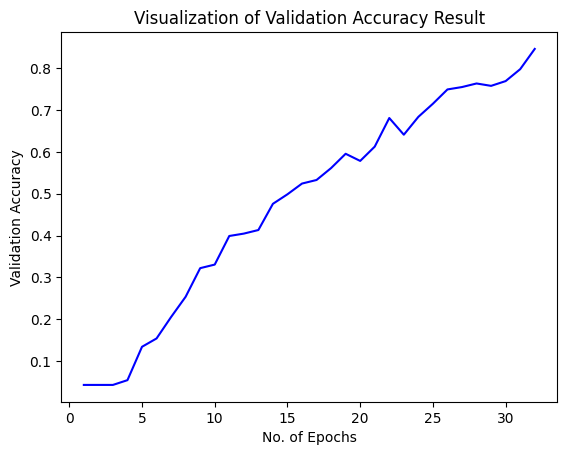

In [27]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Các thuật toán tối ưu/Fruits and vegetables detection/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [30]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 43s 785ms/step - loss: 0.7266 - accuracy: 0.8468
Test accuracy: 0.8467966318130493
